In [1]:
import datasets
import librosa
import warnings
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def add_duration_column(batch):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        speech_array, sample_rate = librosa.load(batch["path"])
    batch["duration"] = librosa.get_duration(y=speech_array, sr=sample_rate)
    return batch

def add_sentence_length(batch):
    batch["sentence_length"] = len(batch["sentence"])
    return batch

def load_dataset(lang):
    dataset = datasets.load_dataset(
        "common_voice", lang, split="train+validation", cache_dir=f"../../_ignore_data/cache/{lang}"
    )
    dataset = dataset.map(add_sentence_length, num_proc=4)
    dataset = dataset.map(add_duration_column, num_proc=4)
    return dataset

def plot(dataset):
    categorical_columns = ["age", "gender"]
    numerical_columns = ["down_votes", "up_votes", "duration", "sentence_length"]

    fig, ax = plt.subplots(1, len(categorical_columns), figsize=(15,3))
    for i, categorical_column in enumerate(categorical_columns):
        df = pd.DataFrame({categorical_column: dataset[categorical_column]})
        df[categorical_column].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_column)
    fig.tight_layout()
    fig.show()

    fig, ax = plt.subplots(1, len(numerical_columns), figsize=(15,3))
    for i, numerical_column in enumerate(numerical_columns):
        pd.Series(dataset[numerical_column]).plot.hist(grid=True, bins=20, rwidth=0.9, ax=ax[i]).set_title(numerical_column)
    fig.tight_layout()
    fig.show() 


# Finnish

In [3]:
# loading data
fi_dataset = load_dataset("fi")

Reusing dataset common_voice (../../_ignore_data/cache/fi/common_voice/fi/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f)
Loading cached processed dataset at ../../_ignore_data/cache/fi/common_voice/fi/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-348eb234c0c4bc3c.arrow
Loading cached processed dataset at ../../_ignore_data/cache/fi/common_voice/fi/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-45e3c60ad9494ad0.arrow
Loading cached processed dataset at ../../_ignore_data/cache/fi/common_voice/fi/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-a8ef5e051758bd46.arrow
Loading cached processed dataset at ../../_ignore_data/cache/fi/common_voice/fi/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-12c07710940c532f.arrow
Loading cached processed dataset at ../../_ignore_data/cache/fi/common_voice/fi/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b2090

In [4]:
# A sample
fi_dataset[0]

{'accent': '',
 'age': 'thirties',
 'client_id': '4eeeb22a3bbb52e5215593a09a845f0f8c496e0a7c498c6d1e9e5e0f8730f79bf16b2b30483dfcc771d430918f27e3ce8b546d068017302109c5c76ca75b0944',
 'down_votes': 0,
 'duration': 4.776009070294784,
 'gender': 'male',
 'locale': 'fi',
 'path': '../../_ignore_data/cache/fi/downloads/extracted/942d7e9d7dc73ed303c062a0f73f00fad56ca1d09d589d26e65d1c84a8d2d613/cv-corpus-6.1-2020-12-11/fi/clips/common_voice_fi_22986631.mp3',
 'segment': "''",
 'sentence': 'Mitä nyt tekisimme?',
 'sentence_length': 19,
 'up_votes': 2}

ipykernel_launcher:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
ipykernel_launcher:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


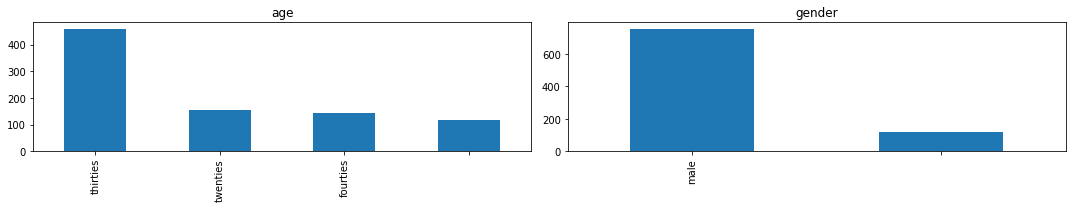

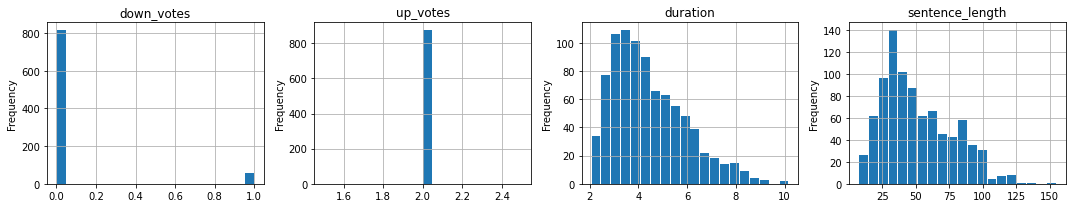

In [5]:
# Some plots
plot(fi_dataset)

# Portuguese

In [6]:
# loading data
pt_dataset = load_dataset("pt")

Reusing dataset common_voice (../../_ignore_data/cache/pt/common_voice/pt/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f)
Loading cached processed dataset at ../../_ignore_data/cache/pt/common_voice/pt/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-0a749816d1e89428.arrow
Loading cached processed dataset at ../../_ignore_data/cache/pt/common_voice/pt/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-d28cb0a82a2cbe2a.arrow
Loading cached processed dataset at ../../_ignore_data/cache/pt/common_voice/pt/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-ee65cef7ad617c1b.arrow
Loading cached processed dataset at ../../_ignore_data/cache/pt/common_voice/pt/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-89748d20da9c2169.arrow
Loading cached processed dataset at ../../_ignore_data/cache/pt/common_voice/pt/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b2090

In [7]:
# A sample
print(pt_dataset[0])

{'accent': '', 'age': 'twenties', 'client_id': 'd76e872cd8e581ed15344f019d4debe9986a03723be3fbc78f85b0cd7ce80f149c3ac2349e0246d64ff31e8878ce2394e114aebac64704e1502787327fcc2ef7', 'down_votes': 0, 'duration': 6.024036281179138, 'gender': 'male', 'locale': 'pt', 'path': '../../_ignore_data/cache/pt/downloads/extracted/f63a86a7403df121b55175b6c4d0f4c742bb5975524e9e33cb4c978fc0f205db/cv-corpus-6.1-2020-12-11/pt/clips/common_voice_pt_20464413.mp3', 'segment': "''", 'sentence': 'ao treinar um modelo todos os fonemas culturais precisam ser avaliados', 'sentence_length': 70, 'up_votes': 2}


ipykernel_launcher:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
ipykernel_launcher:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


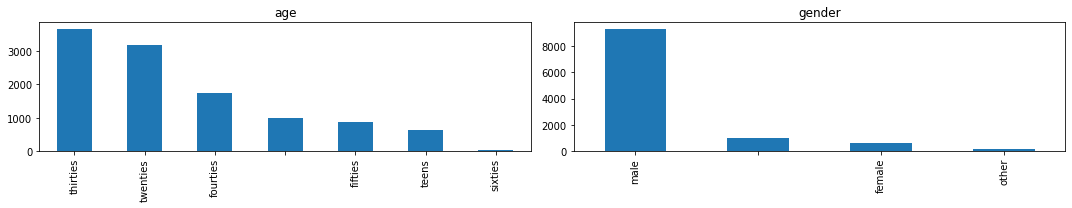

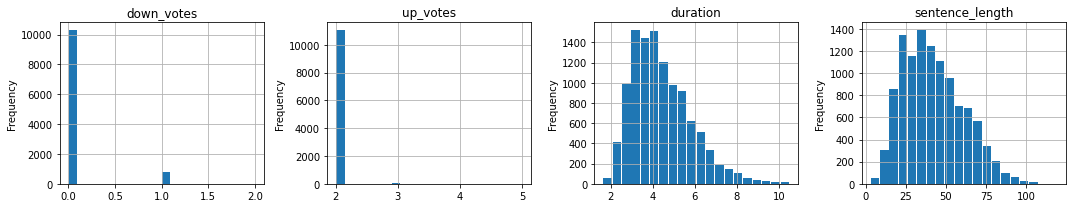

In [8]:
# Some plots
plot(pt_dataset)

# Esperanto

In [9]:
# loading data
eo_dataset = load_dataset("eo")

Reusing dataset common_voice (../../_ignore_data/cache/eo/common_voice/eo/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f)
Loading cached processed dataset at ../../_ignore_data/cache/eo/common_voice/eo/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-167ee0bc759203b3.arrow
Loading cached processed dataset at ../../_ignore_data/cache/eo/common_voice/eo/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-442119e654934d10.arrow
Loading cached processed dataset at ../../_ignore_data/cache/eo/common_voice/eo/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-26ffcbeeddc2a302.arrow
Loading cached processed dataset at ../../_ignore_data/cache/eo/common_voice/eo/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b20901474cffffeb7869f/cache-1a3892203ac44f50.arrow
Loading cached processed dataset at ../../_ignore_data/cache/eo/common_voice/eo/6.1.0/0041e06ab061b91d0a23234a2221e87970a19cf3a81b2090

In [10]:
# A sample
eo_dataset[0]

{'accent': 'internacia',
 'age': 'sixties',
 'client_id': '19ed3e3a7db9203d3225af62933f30c6e0624e00e41505469a2aae5ad09907a6dabf1be856883713b7f3b4d5700b31e84cff0c916f7bfccf36187afb59f75c9d',
 'down_votes': 0,
 'duration': 5.304036281179139,
 'gender': 'female',
 'locale': 'eo',
 'path': '../../_ignore_data/cache/eo/downloads/extracted/d6b88bd1fee958507bc47883e7ed2d23a3cbf1214b9a5de0825d9b94521bb194/cv-corpus-6.1-2020-12-11/eo/clips/common_voice_eo_20690129.mp3',
 'segment': "''",
 'sentence': 'Kun la akvo ankaŭ venas la salo.',
 'sentence_length': 32,
 'up_votes': 2}

ipykernel_launcher:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
ipykernel_launcher:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


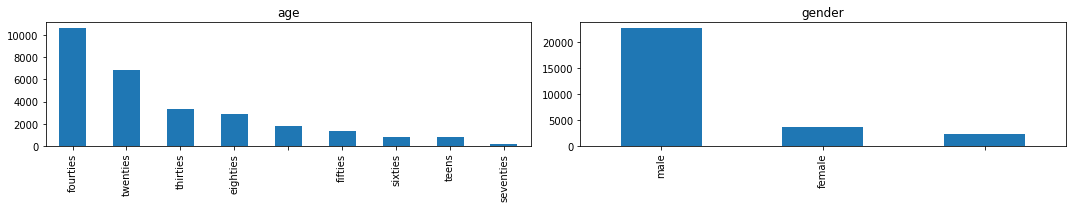

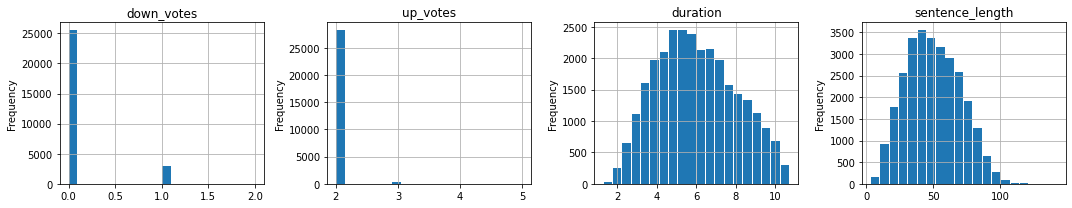

In [11]:
# Some plots
plot(eo_dataset)